In [39]:
import sys
sys.path.append("..")
from src.data_exploratory.load_data import load_data
from src.data_exploratory.clean_data import data_info
from src.data_exploratory.clean_data import replace_empty_string
from src.data_exploratory.clean_data import drop_unused_columns
from src.data_exploratory.clean_data import duplicated_rows
from src.data_exploratory.clean_data import drop_duplicated_rows
from src.data_exploratory.clean_data import check_missing_values
from src.data_exploratory.clean_data import check_value_counts
from src.data_exploratory.clean_data import change_to_numeric
from src.data_exploratory.clean_data import check_number_of_unique_values
from src.data_exploratory.split_data import split_data
from src.data_exploratory.eda import data_summary
from src.data_exploratory.eda import plot_histogram_for_numeric_columns
from src.data_exploratory.eda import  boxplot_for_numeric_columns
from src.data_exploratory.eda import  plot_heatmap_correlation
from src.data_exploratory.preprocess import impute_missing_values
from src.data_exploratory.preprocess import onehotencoding
from src.data_exploratory.preprocess import standard_scaling
from src.data_exploratory.preprocess import impute_missing_values_for_non_train_set
from src.data_exploratory.preprocess import onehotencoding_for_non_train_set
from src.data_exploratory.preprocess import standard_scaling_for_non_train_set
from src.data_exploratory.split_data import split_features_target
from src.data_exploratory.train import run_baseline_model
from src.data_exploratory.train import build_baseline_model
from src.features.features_construction import charges_per_months
from src.features.features_construction import high_monthly_charge
from src.features.features_construction import change_ratio

In [40]:
df = load_data("../data/raw/Telco_customer_churn.xlsx") # Load the data

df.head() # Display the first few rows of the dataframe

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [41]:
df = drop_unused_columns(df, ['Country', 'Zip Code', 'State', 'City', 'CustomerID', 'Longitude', 'Latitude', 'Lat Long', 'Count', 'Churn Label', 'Churn Score', 'Churn Reason', 'CLTV']) # Drop unused columns

df.head() # Display the first few rows of the dataframe after dropping unused columns


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [42]:
data_info(df) # Get basic information about the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [43]:
replace_empty_string(df) # Replace empty strings with NaN

data_info(df) # Get basic information about the dataframe after replacing empty strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

c:\Users\hp\Desktop\telecom-churn-prediction\notebooks\..\src\data_exploratory\clean_data.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace(r'^\s*$', np.nan, regex=True)


In [44]:
duplicated_rows(df) # Check for duplicated rows

np.int64(22)

In [45]:
df = drop_duplicated_rows(df) # Drop duplicated rows

duplicated_rows(df) # Check again for duplicated rows

np.int64(0)

In [46]:
change_to_numeric(df, 'Total Charges') # Change 'Total Charges' column to numeric

<class 'pandas.core.series.Series'>
Index: 7021 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype  
--------------  -----  
7010 non-null   float64
dtypes: float64(1)
memory usage: 109.7 KB


In [47]:
check_missing_values(df) # Check for missing values in the dataframe

Total Charges    11
dtype: int64

In [48]:
train_df, val_df, test_df = split_data(df) # Split the data into train, validation, and test sets

print('train set',train_df.shape)
print('validation set', val_df.shape)
print('test set', test_df.shape)



train set (4212, 20)
validation set (1404, 20)
test set (1405, 20)


In [49]:
check_value_counts(train_df) # Check value counts for categorical columns in the training set

Gender
Male      2123
Female    2089
Name: count, dtype: int64
****************************************
Senior Citizen
No     3533
Yes     679
Name: count, dtype: int64
****************************************
Partner
No     2143
Yes    2069
Name: count, dtype: int64
****************************************
Dependents
No     3234
Yes     978
Name: count, dtype: int64
****************************************
Phone Service
Yes    3790
No      422
Name: count, dtype: int64
****************************************
Multiple Lines
No                  2009
Yes                 1781
No phone service     422
Name: count, dtype: int64
****************************************
Internet Service
Fiber optic    1861
DSL            1432
No              919
Name: count, dtype: int64
****************************************
Online Security
No                     2083
Yes                    1210
No internet service     919
Name: count, dtype: int64
****************************************
Online Backup
No

In [50]:
check_missing_values(train_df) # Check for missing values in the training set

Total Charges    6
dtype: int64

In [51]:
data_summary(train_df) # Get summary statistics for the training set

,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,4212.000000,4212.000000,4206.000000,4212.000000
mean,32.553894,64.670157,2277.299263,0.265195
std,24.551415,30.177308,2256.088621,0.441489
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,34.700000,397.387500,0.000000
50%,29.000000,70.400000,1405.325000,0.000000
75%,56.000000,89.850000,3756.450000,1.000000
max,72.000000,118.600000,8684.800000,1.000000


In [52]:
group_churn = train_df.groupby('Churn Value') # grouping the training set by 'Churn Value' 

data_summary(group_churn) # Get summary statistics grouped by 'Churn Value'

Tenure Months                                                     \
                    count       mean        std  min   25%   50%   75%   max   
Churn Value                                                                    
0                  3095.0  37.950242  24.040947  0.0  15.0  39.0  61.0  72.0   
1                  1117.0  17.601611  19.171592  1.0   2.0  10.0  27.0  72.0   

            Monthly Charges             ...               Total Charges  \
                      count       mean  ...   75%     max         count   
Churn Value                             ...                               
0                    3095.0  61.261696  ...  88.8  118.60        3089.0   
1                    1117.0  74.114369  ...  94.0  118.35        1117.0   

                                                                              
                    mean          std   min     25%     50%      75%     max  
Churn Value                                                                   
0            2561.762625  2322.576895  18.8  587.45  1685.9  4295.35  8594.4  
1            1490.632005  1846.282641  19.1  137.60   713.0  2196.15  8684.8  

[2 rows x 24 columns]

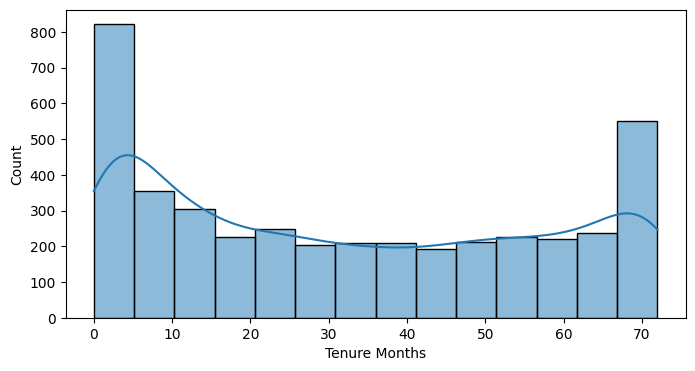

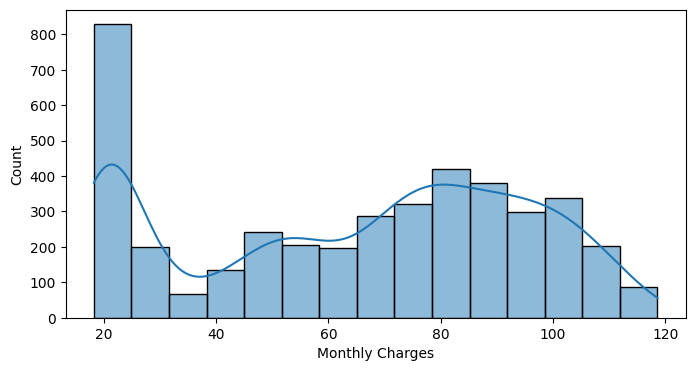

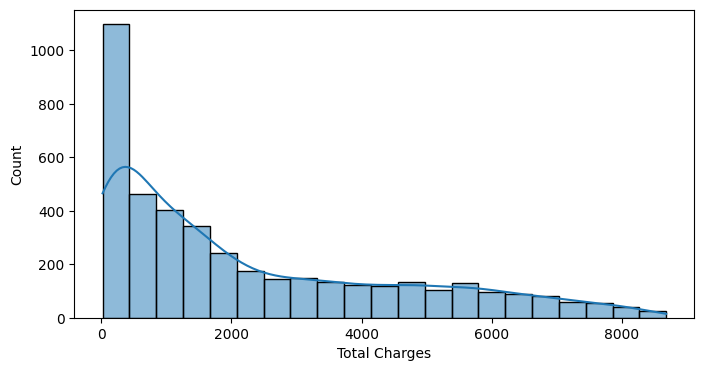

In [53]:
# Visualizing the distribution of numerical columns using histograms

plot_histogram_for_numeric_columns(train_df)

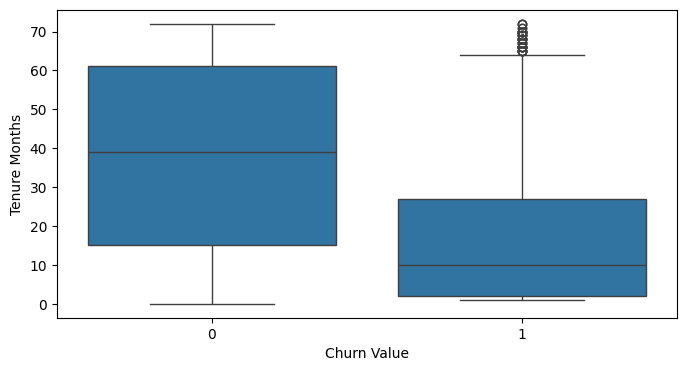

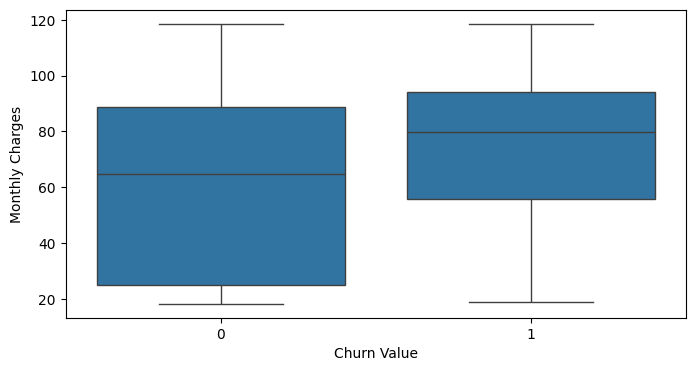

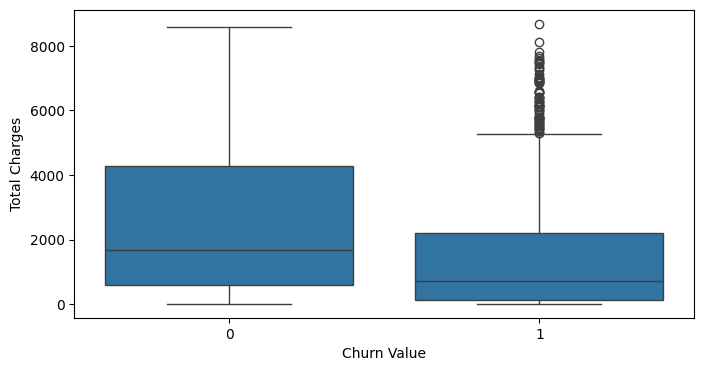

In [54]:
# Visualizing the relationship between the numerical column and the target value (Churn Value) using boxplot


boxplot_for_numeric_columns(train_df)

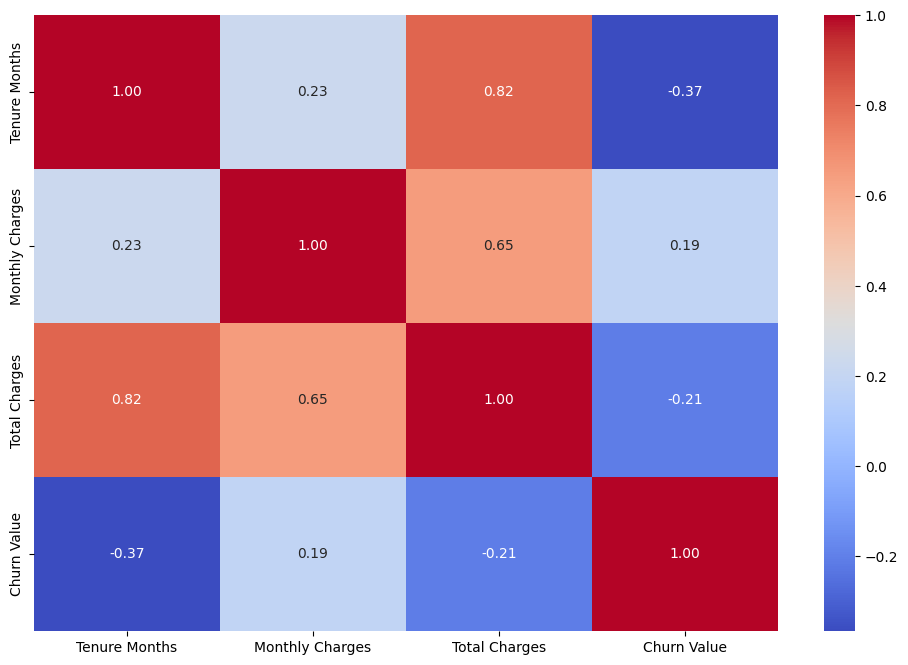

In [55]:
# Visualizing the correlation between the numerical columns using a heatmap


plot_heatmap_correlation(train_df)

In [56]:
check_missing_values(train_df) # Check for missing values in the training set

Total Charges    6
dtype: int64

In [57]:
impute_missing_values(train_df, ['Total Charges']) # Impute missing values in 'Total Charges' column in the training set

In [58]:
check_missing_values(train_df) # Check for missing values in the training set after imputation

No missing values found in the DataFrame.


In [59]:
check_number_of_unique_values(train_df) # Check the number of unique values in each column of the training set

Gender               2
Senior Citizen       2
Partner              2
Dependents           2
Phone Service        2
Multiple Lines       3
Internet Service     3
Online Security      3
Online Backup        3
Device Protection    3
Tech Support         3
Streaming TV         3
Streaming Movies     3
Contract             3
Paperless Billing    2
Payment Method       4
dtype: int64

In [60]:
train_df = onehotencoding(train_df) # Apply one-hot encoding to categorical columns in the training set


In [61]:
train_df.shape # Display the shape of the training set after one-hot encoding

(4212, 47)

In [62]:
impute_missing_values_for_non_train_set(val_df, ['Total Charges']) # Impute missing values in 'Total Charges' column in the validation set

check_missing_values(val_df) # Check for missing values in the validation set after imputation

No missing values found in the DataFrame.


In [63]:
val_df = onehotencoding_for_non_train_set(val_df) # Apply one-hot encoding to categorical columns in the validation set


In [64]:
impute_missing_values_for_non_train_set(test_df, ['Total Charges']) # Impute missing values in 'Total Charges' column in the test set
check_missing_values(test_df) # Check for missing values in the test set after imputation

No missing values found in the DataFrame.


In [65]:
test_df = onehotencoding_for_non_train_set(test_df) # Apply one-hot encoding to categorical columns in the test set

In [66]:

X_train, y_train = split_features_target(train_df) # Split the training set into features and target variable

print("X_train set", X_train.shape)
print("y_train set", y_train.shape)

X_train set (4212, 46)
y_train set (4212,)


In [67]:
X_val, y_val = split_features_target(val_df) # Split the validation set into features and target variable

print("X_val set", X_val.shape)
print("y_val set", y_val.shape)

X_val set (1404, 46)
y_val set (1404,)


In [68]:
X_test, y_test = split_features_target(test_df) # Split the test set into features and target variable

print("X_test set", X_test.shape)
print("y_test set", y_test.shape)

X_test set (1405, 46)
y_test set (1405,)


In [69]:
baseline_model = run_baseline_model(X_train, y_train, X_val, y_val) # Train and evaluate a baseline model

baseline_model

{'AUC-ROC': 0.8521940080731363,
 'Classification Report': {'0': {'precision': 0.8679593721144968,
   'recall': 0.885956644674835,
   'f1-score': 0.8768656716417911,
   'support': 1061.0},
  '1': {'precision': 0.6230529595015576,
   'recall': 0.5830903790087464,
   'f1-score': 0.6024096385542169,
   'support': 343.0},
  'accuracy': 0.811965811965812,
  'macro avg': {'precision': 0.7455061658080272,
   'recall': 0.7345235118417908,
   'f1-score': 0.7396376550980039,
   'support': 1404.0},
  'weighted avg': {'precision': 0.8081282470958087,
   'recall': 0.811965811965812,
   'f1-score': 0.8098155154102825,
   'support': 1404.0}}}

In [ ]:
import numpy as np

X_train['Tenure_months_log'] = np.log1p(X_train['Tenure Months'])
X_train = X_train.drop('Tenure Months', axis=1)
X_val['Tenure_months_log'] = np.log1p(X_val['Tenure Months'])
X_val = X_val.drop('Tenure Months', axis=1)
X_train.head()

" import numpy as np\n\nX_train['Tenure_months_log'] = np.log1p(X_train['Tenure Months'])\nX_train = X_train.drop('Tenure Months', axis=1)\nX_val['Tenure_months_log'] = np.log1p(X_val['Tenure Months'])\nX_val = X_val.drop('Tenure Months', axis=1)\nX_train.head() "

In [ ]:
import numpy as np

X_train['Total_Charges_log'] = np.log1p(X_train['Total Charges'])
X_train = X_train.drop('Total Charges', axis=1)
X_val['Total_Charges_log'] = np.log1p(X_val['Total Charges'])
X_val = X_val.drop('Total Charges', axis=1)
X_train.head()

" import numpy as np\n\nX_train['Total_Charges_log'] = np.log1p(X_train['Total Charges'])\nX_train = X_train.drop('Total Charges', axis=1)\nX_val['Total_Charges_log'] = np.log1p(X_val['Total Charges'])\nX_val = X_val.drop('Total Charges', axis=1)\nX_train.head() "

In [ ]:
baseline_model = run_baseline_model(X_train, y_train, X_val, y_val) # Train and evaluate a baseline model

baseline_model

' baseline_model = run_baseline_model(X_train, y_train, X_val, y_val) # Train and evaluate a baseline model\n\nbaseline_model '

In [73]:
model = build_baseline_model() # Build a baseline model for error analysis

model.fit(X_train, y_train) # Train the model on the training 

val_analysis = X_val.copy() # Create a copy of the validation features for analysis
val_analysis['actual'] = y_val # Add the actual target values to the analysis dataframe
val_analysis['predicted'] = model.predict(X_val) # Add the predicted target values to the analysis dataframe
val_analysis['predict_proba'] = model.predict_proba(X_val)[:,1] # Add the predicted probabilities to the analysis dataframe

val_analysis

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
4628,2,71.65,135.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.451077
1305,1,44.10,44.10,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.605487
5431,22,83.05,1799.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0.584280
1748,38,105.00,4026.40,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.587606
3328,72,80.80,5728.55,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.019968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,10,79.95,857.20,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.735224
3529,11,69.35,712.25,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0.571707
6104,28,25.70,734.60,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.107472
2050,16,19.75,284.35,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.028293


In [74]:
val_analysis.columns.tolist() # List the columns in the validation analysis dataframe

['Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Gender_Female',
 'Gender_Male',
 'Senior Citizen_No',
 'Senior Citizen_Yes',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'Phone Service_No',
 'Phone Service_Yes',
 'Multiple Lines_No',
 'Multiple Lines_No phone service',
 'Multiple Lines_Yes',
 'Internet Service_DSL',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Online Security_No',
 'Online Security_No internet service',
 'Online Security_Yes',
 'Online Backup_No',
 'Online Backup_No internet service',
 'Online Backup_Yes',
 'Device Protection_No',
 'Device Protection_No internet service',
 'Device Protection_Yes',
 'Tech Support_No',
 'Tech Support_No internet service',
 'Tech Support_Yes',
 'Streaming TV_No',
 'Streaming TV_No internet service',
 'Streaming TV_Yes',
 'Streaming Movies_No',
 'Streaming Movies_No internet service',
 'Streaming Movies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'Paperless 

In [75]:
false_negative = val_analysis[(val_analysis['actual'] == 1) & (val_analysis['predicted'] == 0)] # Identify false negatives

false_positive = val_analysis[(val_analysis['actual'] == 0) & (val_analysis['predicted'] == 1)] # Identify false positives

true_positive = val_analysis[(val_analysis['actual'] == 1) & (val_analysis['predicted'] == 1)] # Identify true positives

true_negative = val_analysis[(val_analysis['actual'] == 0) & (val_analysis['predicted'] == 0)] # Identify true negatives


In [ ]:
import pandas as pd

features = [
  'Tenure_months_log', 'Monthly Charges', 'Total_Charges_log',
] # Features to compare between false negatives and true positives


comparison = pd.DataFrame({
  "FN": false_negative[features].median(),
  "TP": true_positive[features].median(),
}) # Create a dataframe for comparison between false negatives and true positives


comparison

,FN,TP
Tenure Months,27.00,6.000
Monthly Charges,70.30,85.075
Total Charges,1544.05,495.050


In [77]:
false_positive.head() # Display the first few rows of the false positives

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
5431,22,83.05,1799.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0.584280
3989,12,84.60,1017.35,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0.673376
6455,33,100.60,3270.25,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0.642529
5101,22,80.00,1706.45,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.539306
2906,29,101.45,2948.60,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0.532879


In [78]:
false_negative.head() # Display the first few rows of the false negatives

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
1661,67,116.20,7752.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0.033453
474,31,86.55,2697.40,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0.478976
261,18,57.45,990.85,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0.420348
346,4,20.35,76.35,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0.237882
646,46,100.70,4541.20,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0.393838


In [79]:
false_negative.describe() # Get summary statistics for the false negatives

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.0,143.000000
mean,28.244755,69.364685,2385.000699,0.489510,0.510490,0.776224,0.223776,0.566434,0.433566,0.853147,...,0.062937,0.328671,0.671329,0.181818,0.195804,0.314685,0.307692,1.0,0.0,0.284891
std,23.471654,26.994330,2396.939229,0.501647,0.501647,0.418239,0.418239,0.497309,0.497309,0.355204,...,0.243703,0.471381,0.471381,0.387050,0.398213,0.466023,0.463161,0.0,0.0,0.138547
min,1.000000,19.000000,19.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.009409
25%,5.000000,49.350000,231.575000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.174569
50%,27.000000,70.300000,1544.050000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.293752
75%,49.000000,94.925000,4135.050000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,0.0,0.402599
max,71.000000,116.200000,7856.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.496074


In [80]:
false_positive.describe() # Get summary statistics for the false positives

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,...,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,121.0,121.000000
mean,12.024793,76.522727,1009.402479,0.520661,0.479339,0.752066,0.247934,0.710744,0.289256,1.0,...,0.0,0.231405,0.768595,0.107438,0.099174,0.735537,0.057851,0.0,1.0,0.625434
std,10.247327,18.587528,990.509642,0.501650,0.501650,0.433609,0.433609,0.455302,0.455302,0.0,...,0.0,0.423484,0.423484,0.310957,0.300138,0.442881,0.234433,0.0,0.0,0.087198
min,1.000000,24.400000,24.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.501754
25%,3.000000,69.600000,214.550000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.556380
50%,9.000000,79.950000,712.250000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,...,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.602929
75%,18.000000,89.550000,1563.900000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.686869
max,47.000000,107.950000,5135.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.810516


In [81]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix from sklearn

matrix = confusion_matrix(y_val, model.predict(X_val)) # Compute the confusion
matrix

array([[940, 121],
       [143, 200]])

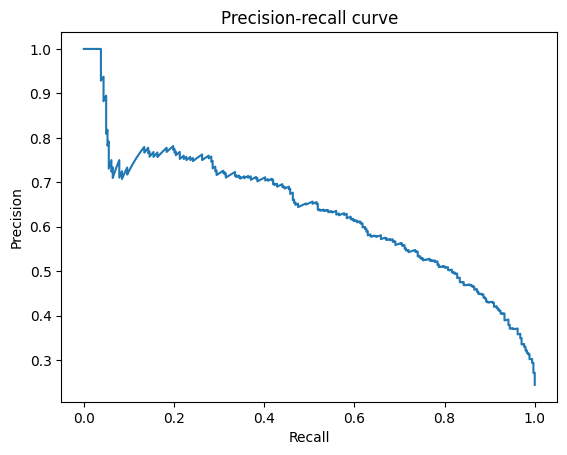

In [82]:
import matplotlib.pyplot as plt # Import matplotlib for plotting
from sklearn.metrics import precision_recall_curve # Import precision_recall_curve from sklearn


precision, recall, thresholds = precision_recall_curve(y_val, val_analysis['predict_proba']) # Compute precision-recall curve


plt.figure() # Create a new figure for the plot
plt.plot(recall, precision) # Plot precision vs. recall
plt.xlabel('Recall') # Label the x-axis
plt.ylabel('Precision') # Label the y-axis
plt.title('Precision-recall curve') # Add a title to the plot
plt.show() # Display the plot

In [83]:
charges_per_months(X_train)
charges_per_months(X_val)

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,charges_per_month
4628,2,71.65,135.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,45.250000
1305,1,44.10,44.10,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.050000
5431,22,83.05,1799.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,78.230435
1748,38,105.00,4026.40,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,103.241026
3328,72,80.80,5728.55,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,78.473288


In [84]:
baseline_model = run_baseline_model(X_train, y_train, X_val, y_val) # Train and evaluate a baseline model

baseline_model

{'AUC-ROC': 0.8541559615632976,
 'Classification Report': {'0': {'precision': 0.8645928636779506,
   'recall': 0.8906691800188501,
   'f1-score': 0.8774373259052924,
   'support': 1061.0},
  '1': {'precision': 0.6270096463022508,
   'recall': 0.5685131195335277,
   'f1-score': 0.5963302752293578,
   'support': 343.0},
  'accuracy': 0.811965811965812,
  'macro avg': {'precision': 0.7458012549901007,
   'recall': 0.7295911497761889,
   'f1-score': 0.736883800567325,
   'support': 1404.0},
  'weighted avg': {'precision': 0.8065508098603829,
   'recall': 0.811965811965812,
   'f1-score': 0.8087623128128097,
   'support': 1404.0}}}

In [85]:
high_monthly_charge(X_train)
high_monthly_charge(X_val)

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,charges_per_month,high_monthly_charge
4628,2,71.65,135.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,45.250000,0
1305,1,44.10,44.10,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.050000,0
5431,22,83.05,1799.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,78.230435,0
1748,38,105.00,4026.40,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,103.241026,1
3328,72,80.80,5728.55,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,78.473288,0


In [86]:
baseline_model = run_baseline_model(X_train, y_train, X_val, y_val) # Train and evaluate a baseline model

baseline_model

{'AUC-ROC': 0.854183439903496,
 'Classification Report': {'0': {'precision': 0.8638025594149908,
   'recall': 0.8906691800188501,
   'f1-score': 0.877030162412993,
   'support': 1061.0},
  '1': {'precision': 0.6258064516129033,
   'recall': 0.565597667638484,
   'f1-score': 0.5941807044410413,
   'support': 343.0},
  'accuracy': 0.8112535612535613,
  'macro avg': {'precision': 0.7448045055139471,
   'recall': 0.728133423828667,
   'f1-score': 0.7356054334270172,
   'support': 1404.0},
  'weighted avg': {'precision': 0.8056596356428284,
   'recall': 0.8112535612535613,
   'f1-score': 0.8079294757432071,
   'support': 1404.0}}}

In [87]:
change_ratio(X_train)
change_ratio(X_val)

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,charges_per_month,high_monthly_charge,change_ration
4628,2,71.65,135.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,45.250000,0,1.583425
1305,1,44.10,44.10,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.050000,0,2.000000
5431,22,83.05,1799.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,78.230435,0,1.061607
1748,38,105.00,4026.40,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,103.241026,1,1.017038
3328,72,80.80,5728.55,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,78.473288,0,1.029650


In [88]:
baseline_model = run_baseline_model(X_train, y_train, X_val, y_val) # Train and evaluate a baseline model

baseline_model

{'AUC-ROC': 0.8539416305097506,
 'Classification Report': {'0': {'precision': 0.8642201834862385,
   'recall': 0.8878416588124411,
   'f1-score': 0.8758716875871687,
   'support': 1061.0},
  '1': {'precision': 0.6210191082802548,
   'recall': 0.5685131195335277,
   'f1-score': 0.593607305936073,
   'support': 343.0},
  'accuracy': 0.8098290598290598,
  'macro avg': {'precision': 0.7426196458832466,
   'recall': 0.7281773891729844,
   'f1-score': 0.7347394967616209,
   'support': 1404.0},
  'weighted avg': {'precision': 0.8048056757970274,
   'recall': 0.8098290598290598,
   'f1-score': 0.8069139362293867,
   'support': 1404.0}}}

In [50]:
model = build_baseline_model() # Build a baseline model for error analysis

model.fit(X_train, y_train) # Train the model on the training 

val_analysis = X_val.copy() # Create a copy of the validation features for analysis
val_analysis['actual'] = y_val # Add the actual target values to the analysis dataframe
val_analysis['predicted'] = model.predict(X_val) # Add the predicted target values to the analysis dataframe
val_analysis['predict_proba'] = model.predict_proba(X_val)[:,1] # Add the predicted probabilities to the analysis dataframe

val_analysis

c:\Users\hp\Desktop\telecom-churn-prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,charges_per_month,high_monthly_charge,change_ration,actual,predicted,predict_proba
4628,2,71.65,135.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,45.250000,0,1.549189,0,1,0.519998
1305,1,44.10,44.10,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,22.050000,0,1.913232,1,1,0.689043
5431,22,83.05,1799.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,78.230435,1,1.048208,0,1,0.550025
1748,38,105.00,4026.40,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,103.241026,1,1.007281,1,1,0.572751
3328,72,80.80,5728.55,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,78.473288,1,1.016694,0,0,0.027094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,10,79.95,857.20,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,77.927273,1,1.012958,1,1,0.655266
3529,11,69.35,712.25,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,59.354167,0,1.149051,0,1,0.536628
6104,28,25.70,734.60,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,25.331034,0,0.976035,0,0,0.117499
2050,16,19.75,284.35,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,16.726471,0,1.114153,0,0,0.020960


In [51]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix from sklearn

matrix = confusion_matrix(y_val, model.predict(X_val)) # Compute the confusion
matrix

array([[945, 116],
       [145, 198]])

In [52]:
false_negative = val_analysis[(val_analysis['actual'] == 1) & (val_analysis['predicted'] == 0)] # Identify false negatives

false_positive = val_analysis[(val_analysis['actual'] == 0) & (val_analysis['predicted'] == 1)] # Identify false positives

true_positive = val_analysis[(val_analysis['actual'] == 1) & (val_analysis['predicted'] == 1)] # Identify true positives

true_negative = val_analysis[(val_analysis['actual'] == 0) & (val_analysis['predicted'] == 0)] # Identify true negatives


In [53]:
false_negative.describe()

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,charges_per_month,high_monthly_charge,change_ration,actual,predicted,predict_proba
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.0,145.0,145.000000
mean,28.813793,70.571379,2432.561379,0.475862,0.524138,0.793103,0.206897,0.572414,0.427586,0.862069,...,0.151724,0.193103,0.344828,0.310345,65.720831,0.462069,1.115392,1.0,0.0,0.281916
std,22.657776,26.861250,2332.602774,0.501148,0.501148,0.406485,0.406485,0.496443,0.496443,0.346023,...,0.359997,0.396102,0.476960,0.464238,29.325823,0.500287,0.214751,0.0,0.0,0.136819
min,1.000000,19.000000,19.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.725000,0.000000,0.955703,1.0,0.0,0.009735
25%,7.000000,49.900000,308.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,41.320000,0.000000,1.001985,1.0,0.0,0.176225
50%,27.000000,71.150000,1863.800000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,67.132609,0.000000,1.030155,1.0,0.0,0.298019
75%,48.000000,94.850000,4056.750000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,91.971311,1.000000,1.130079,1.0,0.0,0.392087
max,71.000000,116.200000,7856.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,114.004412,1.000000,1.944942,1.0,0.0,0.498626
